# How to get data from different sources using Python

We can use Python to get data from various sources, such as Yahoo Finance, Fed St. Louis (Fred), Google Finance etc.  Due to the service agreement or data license or traffic issues, it is common for some data providers to stop providing this kind of service. But you can always find the information from website.

There are different ways and APIs for this kind of tasks.  Here I am using Pandas-DataReader.  

#### Resource: 
[How to get data from Internet](https://s3.amazonaws.com/assets.datacamp.com/production/course_3882/slides/ch2.pdf)

[Python by Quant Economics](https://lectures.quantecon.org/py/)

[Noble Prize Winner Thomas Sargent's website](https://lectures.quantecon.org/py/pandas.html)

[Pandas Official Documents](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

[Markdown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

[LaTex for Math Formula](http://data-blog.udacity.com/posts/2016/10/latex-primer/)


In [1]:
# have packages imported for data
#from pandas_datareader import data

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime as dt


# Example on how to get data from Fred (St. Louis Fed)  (This is only one working!)
Here we retrieve month CPI index from 2000.1.1 to current.

Source:  fred -Fed St. Louis

CPIAUCNS - CPI 

DGS10 - 10 year constant maturity rate

'DCOILWTICO' # West Texas Intermediate Oil Price.
                
[FRED Data Category List](https://fred.stlouisfed.org/categories)


sdt = dt.datetime(2018, 1, 1)
edt = dt.datetime(2019, 2, 1)
ticker = 'DGS10'  
source = 'fred'
cpi = web.DataReader(ticker, source, sdt, edt)

## Example: Create a yield curve using constant maturity Yield
We use the following tenors: 1M, 3M, 6M, 1Y, 2Y, 3Y, 5Y, 7Y, 10Y, 20Y, 30Y

In [2]:
ticker = ['DGS1MO', 'DGS3MO', 'DGS6MO','DGS1','DGS2', 'DGS3', 'DGS5','DGS7', 'DGS10','DGS20','DGS30']
sdt = dt.datetime(2000, 1, 1)
edt = dt.datetime(2019, 3, 9)
source = 'fred'
yieldcurve = pd.DataFrame(web.DataReader(ticker, source, sdt, edt))
yieldcurve = yieldcurve.dropna()
yieldcurve.to_csv('yieldcurvenona.csv')


## Example on how to get data from NYSE  (not working)

In [3]:
yieldcurve.tail(10)


,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,,
2019-02-25,2.44,2.47,2.51,2.56,2.51,2.48,2.48,2.57,2.67,2.87,3.03
2019-02-26,2.43,2.45,2.51,2.55,2.48,2.44,2.45,2.54,2.64,2.84,3.01
2019-02-27,2.43,2.45,2.52,2.54,2.50,2.48,2.49,2.59,2.69,2.91,3.07
2019-02-28,2.44,2.45,2.50,2.54,2.52,2.50,2.52,2.63,2.73,2.94,3.09
2019-03-01,2.44,2.44,2.52,2.55,2.55,2.54,2.56,2.67,2.76,2.97,3.13
2019-03-04,2.45,2.46,2.54,2.54,2.55,2.52,2.53,2.63,2.72,2.93,3.09
2019-03-05,2.44,2.46,2.53,2.54,2.55,2.52,2.53,2.63,2.72,2.93,3.08
2019-03-06,2.43,2.47,2.53,2.54,2.52,2.49,2.49,2.59,2.69,2.90,3.06
2019-03-07,2.45,2.45,2.52,2.52,2.47,2.44,2.44,2.54,2.64,2.86,3.03


In [4]:
# nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')
# nyse = nyse.sort_values('Market Capitalization', ascending=False)
# nyse[['Stock Symbol', 'Company Name']].head(3)

# Example: To get data from Yahoo Finance

Run analysis @ Fri Apr 19 09:24:48 2019


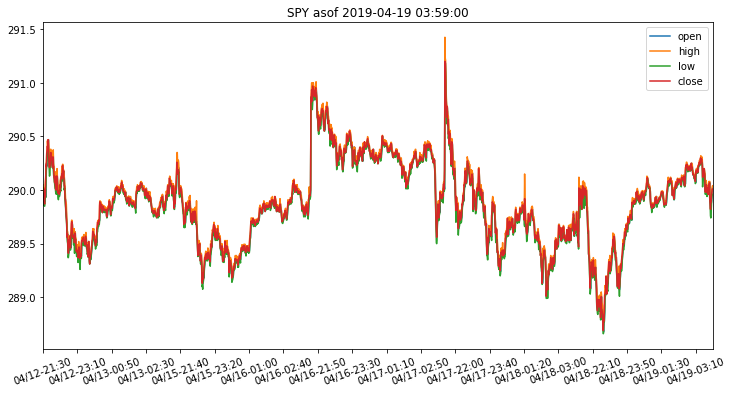

In [5]:
import requests
import os, time


# Set local time zone to NYC
#  os.environ['TZ']='America/New_York'  comment this one out by David Li
# time.tzset()   this is only valid for Linux or OS
t=time.localtime() # string
print('Run analysis @ {}'.format(time.ctime()))


ticker='SPY'
urx="https://query1.finance.yahoo.com/v8/finance/chart/{}?region=US&lang=en-US&includePrePost=false&interval={}&period1={}&period2={}"
# period1=(dt.datetime.today().date()-dt.timedelta(7)).strftime('%s')
# period2=dt.datetime.today().date().strftime('%s')
endDate=dt.datetime.today().date()
period2 = int((endDate-dt.date(1970,1,1)).total_seconds())
period1 = int((endDate-dt.timedelta(7)-dt.date(1970,1,1)).total_seconds())


url = urx.format(ticker,'1m',period1,period2)

jTmp = pd.read_json(url)['chart']['result'][0]
pbdatetime = [ dt.datetime.fromtimestamp(int(x)) for x in jTmp['timestamp'] ]
df=pd.DataFrame(jTmp['indicators']['quote'][0])
df.loc[:,'ticker']=ticker

# use numerical index instead of time index for better display multiple days plot
#df.set_index(pd.DatetimeIndex(pbdatetime),inplace=True)

df.dropna(inplace=True)
df = df[['open','high','low','close']]
title = '{} asof {}'.format(ticker,pbdatetime[-1])
fig, ax=plt.subplots(figsize=(12,6))
df.plot(ax=ax,title=title)

# set xticks for better display multiple days plot
plt.locator_params(axis='x', nbins=20)  # x-axis
vn=range(len(pbdatetime))
xtcks = [pbdatetime[int(j)].strftime('%m/%d-%H:%M') if j in vn else None for j in ax.get_xticks()]
ax.set_xticklabels(xtcks)

plt.xticks(rotation='20',fontsize=10)
plt.show()

## Yield Curve Analysis Example

We will use the yield curve data to do Principle Component Analysis (PCA) and Principle Axis (PA) Factor analysis



### First step: preparing the data


In [6]:
headers = ['date', '1m', '3m', '6m', '1y', '2y', '3y', '5y', '7y', '10y', '20y', '30y'] 
df = pd.read_csv('yieldcurvenona.csv', index_col=0, parse_dates=True, header=0, names=headers)
df.describe()

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
count,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000
mean,1.107435,1.156599,1.262969,1.360669,1.576596,1.806831,2.278043,2.657612,3.004789,3.542130,3.698952
std,1.607389,1.620736,1.639098,1.591729,1.468841,1.378388,1.228999,1.114696,1.025154,1.014419,0.868590
min,0.000000,0.000000,0.020000,0.080000,0.160000,0.280000,0.560000,0.910000,1.370000,1.690000,2.110000
25%,0.040000,0.060000,0.120000,0.190000,0.490000,0.847500,1.420000,1.900000,2.200000,2.690000,2.980000
50%,0.160000,0.190000,0.360000,0.510000,0.900000,1.320000,1.880000,2.300000,2.750000,3.270000,3.465000
75%,1.730000,1.820000,1.970000,2.210000,2.492500,2.620000,2.810000,3.180000,3.700000,4.430000,4.510000
max,5.270000,5.190000,5.330000,5.300000,5.290000,5.260000,5.230000,5.230000,5.260000,5.910000,5.620000


From the min values, we know there is zero values in column '1m' and '3m'. We need to drop these rows that have zero values in order to calculate percentage changes over time.

In [7]:
df = df[(df['1m'] > 1e-10) & (df['3m'] > 1e-10) ]
df.describe()

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
count,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,1.138477,1.188658,1.296166,1.392899,1.607487,1.836959,2.306012,2.683128,3.027822,3.562920,3.716247
std,1.618914,1.631815,1.649714,1.601944,1.477075,1.384716,1.233309,1.118369,1.028943,1.019481,0.873008
min,0.010000,0.010000,0.020000,0.090000,0.180000,0.280000,0.560000,0.910000,1.370000,1.690000,2.110000
25%,0.050000,0.070000,0.130000,0.200000,0.500000,0.855000,1.440000,1.920000,2.220000,2.695000,2.980000
50%,0.170000,0.210000,0.390000,0.540000,0.920000,1.360000,1.920000,2.340000,2.780000,3.310000,3.540000
75%,1.770000,1.855000,2.010000,2.240000,2.520000,2.640000,2.830000,3.210000,3.720000,4.460000,4.520000
max,5.270000,5.190000,5.330000,5.300000,5.290000,5.260000,5.230000,5.230000,5.260000,5.910000,5.620000


Now all min values are greater than zero.

In [83]:
dfp = df.pct_change().dropna() # drop the first line
dfp.head()

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
date,,,,,,,,,,,
2001-08-01,-0.005450,-0.002825,0.000000,0.008499,0.010554,0.007389,0.010941,0.008230,0.007890,0.003565,0.003630
2001-08-02,0.000000,0.000000,-0.002882,0.002809,0.015666,0.019560,0.015152,0.014286,0.011742,0.008881,0.007233
2001-08-03,-0.005479,-0.002833,0.002890,0.000000,0.005141,0.011990,0.006397,0.004024,0.005803,0.003521,0.003591
2001-08-06,-0.002755,0.000000,0.000000,-0.002801,-0.007673,-0.011848,-0.002119,0.000000,-0.001923,0.000000,0.000000
2001-08-07,0.002762,0.000000,0.000000,0.000000,0.005155,0.004796,0.002123,0.002004,0.001927,0.001754,0.001789


In [84]:
dfp.describe()

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000
mean,0.046320,0.025279,0.003772,0.001238,0.001001,0.000681,0.000314,0.000143,0.000020,-0.000064,-0.000062
std,0.385021,0.299195,0.092312,0.053522,0.047995,0.040971,0.031826,0.026186,0.020918,0.016845,0.015564
min,-0.928571,-0.964286,-0.730769,-0.300000,-0.296296,-0.266667,-0.230000,-0.200758,-0.168874,-0.154122,-0.160149
25%,-0.021593,-0.010738,-0.009372,-0.013699,-0.018868,-0.019384,-0.016000,-0.014106,-0.011423,-0.009564,-0.009077
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.016203,0.010417,0.009167,0.010455,0.019504,0.018838,0.015152,0.013453,0.011111,0.008922,0.008218
max,6.000000,6.666667,1.538043,1.118182,0.569024,0.320000,0.158879,0.125926,0.113402,0.110169,0.103448


In [104]:
dfc = (df.pct_change()*df).dropna() # drop the first line
dfc.head()

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
date,,,,,,,,,,,
2001-08-01,-0.019891,-0.009972,0.000000,0.030255,0.040422,0.030222,0.050547,0.040329,0.040316,0.020071,0.020073
2001-08-02,0.000000,0.000000,-0.009971,0.010028,0.060940,0.081565,0.071061,0.071000,0.060705,0.050444,0.040289
2001-08-03,-0.019890,-0.009972,0.010029,0.000000,0.020103,0.050600,0.030192,0.020080,0.030174,0.020070,0.020072
2001-08-06,-0.009972,0.000000,0.000000,-0.009972,-0.029770,-0.049408,-0.009979,0.000000,-0.009981,0.000000,0.000000
2001-08-07,0.010028,0.000000,0.000000,0.000000,0.020103,0.020096,0.010021,0.010020,0.010019,0.010018,0.010018


In [86]:
dfc.describe()

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000
mean,0.009293,0.005655,0.002611,0.001612,0.001609,0.001411,0.001046,0.000769,0.000412,0.000088,0.000093
std,0.170133,0.150338,0.133044,0.098452,0.067670,0.059819,0.059441,0.060552,0.057713,0.056893,0.055569
min,-0.786244,-0.531064,-0.408669,-0.424471,-0.457394,-0.434555,-0.354200,-0.423598,-0.423874,-0.727455,-0.722272
25%,-0.009868,-0.009375,-0.009583,-0.009833,-0.019708,-0.028378,-0.029660,-0.029807,-0.029800,-0.029811,-0.029793
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.012000,0.010714,0.010354,0.010385,0.020606,0.030198,0.030551,0.030553,0.030396,0.030313,0.030281
max,6.530233,7.221609,7.182663,5.210727,2.651650,1.478400,0.383296,0.337190,0.263767,0.288644,0.302147


### Perform PCA (3 factors)

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
#pca.fit(dfp) # percentage change
pca.fit(dfc) # absolute change

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
print('Explained variance by component: {}'.format(pca.explained_variance_ratio_))

Explained variance by component: [0.68950367 0.17543407 0.09062381]


In [94]:
np.sum(pca.explained_variance_ratio_)

0.9555615526690301

With only the first 3 PCs, we can explain 97% of the total variance

In [95]:
print("Factor loading:")
print(pd.DataFrame(pca.components_,columns=headers[1:]))

Factor loading:
         1m        3m        6m        1y        2y        3y        5y  \
0  0.557887  0.527628  0.472776  0.348100  0.201152  0.136290  0.066581   
1  0.131149  0.083889  0.055977 -0.034853 -0.229302 -0.312396 -0.406988   
2  0.819236 -0.357977 -0.342093 -0.229998 -0.107736 -0.046627  0.013379   

         7y       10y       20y       30y  
0  0.038481  0.020679 -0.010871 -0.013530  
1 -0.433795 -0.415954 -0.393589 -0.373492  
2  0.040535  0.053883  0.080456  0.076146  


Plot the factor loadings for the first 3 principle components

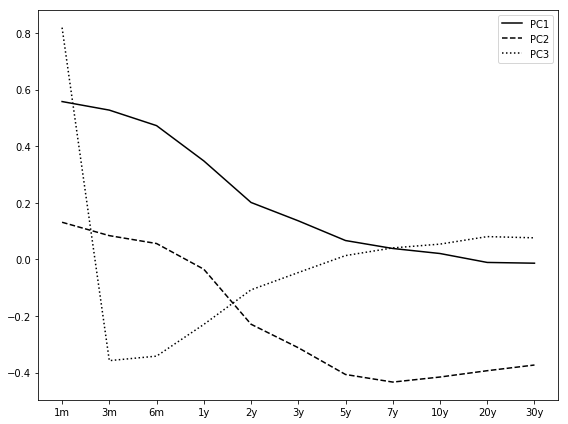

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(headers[1:], pca.components_[0], 'k', label='PC1')
ax.plot(headers[1:], pca.components_[1], 'k--', label='PC2')
ax.plot(headers[1:], pca.components_[2], 'k:', label='PC3')
ax.legend()
fig.tight_layout()
plt.show()

In [97]:
sig = np.sqrt(pca.explained_variance_)
sig

array([0.26772391, 0.13504417, 0.09705994])

For confidence level 99%, the Z score is 2.576, we need to create scenarios by moving each PC with $2.576\sigma$ up or down. For three factors, the number of combinations of up/down movements is 8. Including the base scenario, the total number of curves is 9

In [99]:
yclist = np.zeros((9,len(headers[1:])))
yclist[0] = df.tail(1)
'''
for i in range(2):
    for j in range(2):
        for k in range(2):
            yclist[2*(2*i+j)+k+1, :] = yclist[0]*np.exp(
                + pca.components_[0]*2.576*(2*i-1)*sig[0] 
                + pca.components_[1]*2.576*(2*j-1)*sig[1] 
                + pca.components_[2]*2.576*(2*k-1)*sig[2])
'''
for i in range(2):
    for j in range(2):
        for k in range(2):
            yclist[2*(2*i+j)+k+1, :] = yclist[0] + (
                + pca.components_[0]*2.576*(2*i-1)*sig[0] 
                + pca.components_[1]*2.576*(2*j-1)*sig[1] 
                + pca.components_[2]*2.576*(2*k-1)*sig[2])


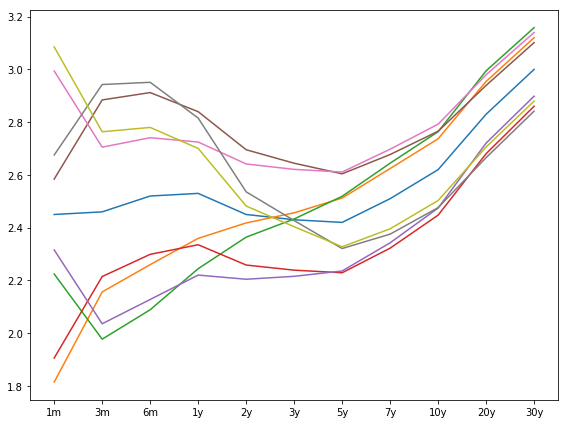

In [100]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(headers[1:], yclist.T)
fig.tight_layout()
plt.show()

### Principle Axis Analysis

In [68]:
R = dfp.cov().values
n = R.shape[0]
Rn = np.linalg.solve(R, np.identity(n))
smc = np.diag(R) - 1/np.diag(Rn)
di = np.diag_indices(n)
R[di] = smc
eigenValues, eigenVectors = np.linalg.eig(R)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
totprop = 0
for i in eigenValues:
    totprop += i / np.sum(eigenValues)
    print(totprop)

1.3178458208572772
1.4720906391549922
1.4975109424336617
1.500680072080193
1.5010697012858543
1.5009732796029813
1.5008374488562737
1.5003934600479545
1.496866670698705
1.4780814288934172
0.9999999999999996


In [69]:
eigenValues

array([ 5.05222568e-02,  5.91328379e-03,  9.74538198e-04,  1.21494927e-04,
        1.49372153e-05, -3.69651817e-06, -5.20734350e-06, -1.70211995e-05,
       -1.35206528e-04, -7.20169838e-04, -1.83282083e-02])

Choose 3 or 4 as the num of factors

In [70]:
nf = 3
lam = eigenVectors[:,:nf]@np.diag(np.sqrt(eigenValues[:nf]))
h2 = np.sum(lam**2, axis=1)
u2 = 1 -  h2
com = np.sum(lam**2, axis=1)**2 / np.sum(lam**4, axis=1)
corpa = pd.DataFrame(np.column_stack((np.round(lam[:,0], 2),
                                      np.round(lam[:,1], 2),
                                      np.round(lam[:,2], 2),
                      np.round(h2, 2),
                      np.round(u2, 3),
                      np.round(com, 1))),
                      columns=['PA1', 'PA2', 'PA3', 'h2', 'u2', 'com'])
corpa

,PA1,PA2,PA3,h2,u2,com
0,0.15,-0.01,0.00,0.02,0.977,1.0
1,0.15,-0.01,0.00,0.02,0.976,1.0
2,0.05,0.01,-0.01,0.00,0.997,1.3
3,0.02,0.02,-0.01,0.00,0.999,2.6
4,0.01,0.04,-0.01,0.00,0.998,1.3
5,0.01,0.04,0.00,0.00,0.998,1.1
6,0.01,0.03,0.01,0.00,0.999,1.2
7,0.00,0.02,0.01,0.00,0.999,1.5
8,0.00,0.02,0.01,0.00,1.000,1.7
9,0.00,0.01,0.01,0.00,1.000,2.0


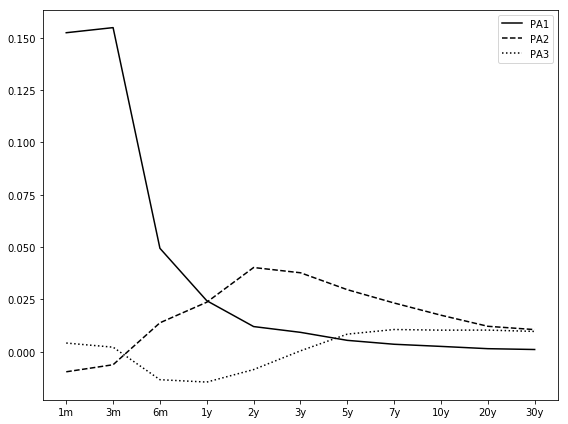

In [73]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(headers[1:], lam[:,0], 'k', label='PA1')
ax.plot(headers[1:], lam[:,1], 'k--', label='PA2')
ax.plot(headers[1:], lam[:,2], 'k:', label='PA3')
ax.legend()
fig.tight_layout()
plt.show()

### Independent Component Analysis

Scikit learn provides method to perform Independent component analysis.


In [20]:
from sklearn.decomposition import FastICA

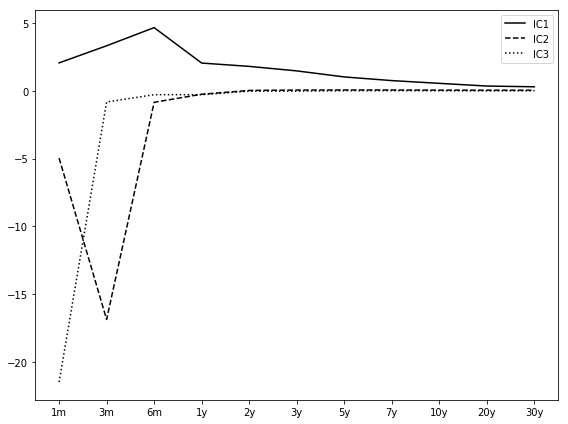

In [21]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(dfp)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

###############################################################################
# Plot results
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(headers[1:], A_[:,0], 'k', label='IC1')
ax.plot(headers[1:], A_[:,1], 'k--', label='IC2')
ax.plot(headers[1:], A_[:,2], 'k:', label='IC3')
ax.legend()
fig.tight_layout()
plt.show()

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [23]:
kmo_all, kmo_model = calculate_kmo(dfp)

In [24]:
kmo_model

0.88123314965869

kmo greater than 0.6, factor analysis is valid.

In [25]:
from factor_analyzer import FactorAnalyzer

In [41]:
fa = FactorAnalyzer(rotation=None)
fa.fit(dfp)
ev, v = fa.get_eigenvalues()
ev

array([6.08917544, 1.78694397, 1.01774495, 0.74056604, 0.6001476 ,
       0.46606589, 0.16251601, 0.07728149, 0.02627985, 0.01749971,
       0.01577906])

Three eigenvalues are greator than 1, choose a three factor model

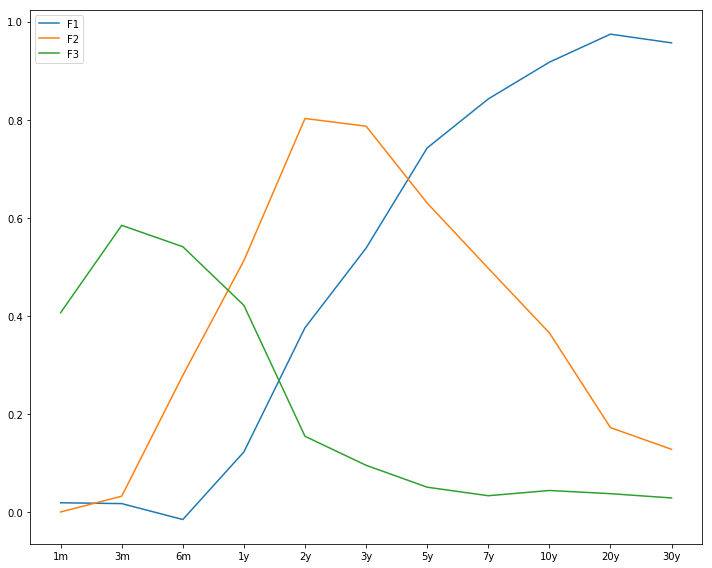

In [102]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax', is_corr_matrix=False)
fa.fit(dfp)

fig, ax = plt.subplots(figsize=(10,8))
for i in range(3):
    ax.plot(headers[1:], fa.loadings_[:,i], label='F'+str(i+1))
ax.legend()
fig.tight_layout()
plt.show()

In [103]:
fvar = fa.get_factor_variance()
fvDf = pd.DataFrame({'SS Loadings':fvar[0],'Proportion Var':fvar[1],'Cumulative Var':fvar[2]})

fvDf

,SS Loadings,Proportion Var,Cumulative Var
0,4.413978,0.401271,0.401271
1,2.427093,0.220645,0.621916
2,1.017010,0.092455,0.714371
